# Project 8 - Recommender System for Movies

## Problem Statement:

- This notebook implements a movie recommender system. 
- Recommender systems are used to suggest movies or songs to users based on their interest or usage history. 
- For example, Netflix recommends movies to watch based on the previous movies you've watched.  
- In this example, we will use Item-based Collaborative Filter 


- Dataset MovieLens: https://grouplens.org/datasets/movielens/100k/ 
- Photo Credit: https://pxhere.com/en/photo/1588369

# Stage 1 - Import the dataset and Libraries:

### Import the Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import the Dataset:

##### Dataset 1: Movie titles

In [2]:
data_movies_titles = pd.read_csv("Movie_Id_Titles")

In [3]:
data_movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


##### Dataset 2: Movie Ratings

In [4]:
data_movies_ratings = pd.read_csv('u.data', sep = '\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [5]:
data_movies_ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
data_movies_ratings.tail()

,user_id,item_id,rating,timestamp
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156
100002,12,203,3,879959583


As it can be seen from the dataframe above, the "timestamp" column presents with data that is not useful at this moment. 

##### Drop the "timestamp" column.

In [8]:
data_movies_ratings.drop(['timestamp'], axis = 1, inplace = True)

In [9]:
data_movies_ratings.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


#### Explore further details of the Dataset:

In [10]:
data_movies_ratings.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [11]:
data_movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
user_id    100003 non-null int64
item_id    100003 non-null int64
rating     100003 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


#### Create the dataset required: Merging Dataset 1 and 2 together:

As both dataset have the same "item_id" column, it will be merge on this column.

In [12]:
data_movies = pd.merge(data_movies_ratings, data_movies_titles, on = 'item_id')

In [13]:
data_movies.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [14]:
data_movies.shape

(100003, 4)

# Stage 2 - Exploratory Data Analysis:

### Describe the data by statistics where Group the dataset by its Title:

In [16]:
data_movies.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.00,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.00,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.00,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.00,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.00,5.0
2 Days in the Valley (1996),93.0,3.225806,0.957000,1.0,3.00,3.0,4.00,5.0
"20,000 Leagues Under the Sea (1954)",72.0,3.500000,0.731581,2.0,3.00,4.0,4.00,5.0
2001: A Space Odyssey (1968),259.0,3.969112,1.026307,1.0,3.00,4.0,5.00,5.0
3 Ninjas: High Noon At Mega Mountain (1998),5.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


## Visualise the highest rated movies:

In [17]:
# Get the mean rating of the movies: 'mean' column

data_movies.groupby('title')['rating'].describe()['mean']

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [18]:
# Get the count of each movie titles: 'count' column
data_movies.groupby('title')['rating'].describe()['count']

title
'Til There Was You (1997)                                     9.0
1-900 (1994)                                                  5.0
101 Dalmatians (1996)                                       109.0
12 Angry Men (1957)                                         125.0
187 (1997)                                                   41.0
2 Days in the Valley (1996)                                  93.0
20,000 Leagues Under the Sea (1954)                          72.0
2001: A Space Odyssey (1968)                                259.0
3 Ninjas: High Noon At Mega Mountain (1998)                   5.0
39 Steps, The (1935)                                         59.0
8 1/2 (1963)                                                 38.0
8 Heads in a Duffel Bag (1997)                                4.0
8 Seconds (1994)                                              4.0
A Chef in Love (1996)                                         8.0
Above the Rim (1994)                                          5.0
Abso

In [19]:
data_movies_MeanRatings = data_movies.groupby('title')['rating'].describe()['mean']
data_movies_CountTitles = data_movies.groupby('title')['rating'].describe()['count']

#### Create new dataset for the mean and the count:

In [20]:
MeanCountRatings_df = pd.concat([data_movies_MeanRatings, data_movies_CountTitles], axis = 1)

In [21]:
MeanCountRatings_df.head()

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0


Need to reset the index.

In [26]:
MeanCountRatings_df = MeanCountRatings_df.reset_index()

In [28]:
MeanCountRatings_df.head()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0


#### Visualise the data:

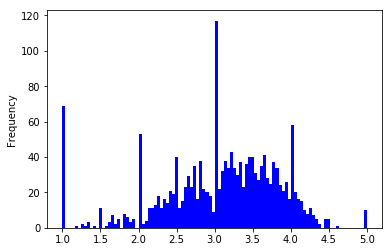

In [38]:
MeanCountRatings_df['mean'].plot(bins = 100, kind = 'hist', color = 'b')

Most of the ratings can be seen to peaking at 1, 2, 3, 4 stars, with little at 5 stars. There are also a good amount of reviews in the 2 to 3 star range and 3 to 4 star range.

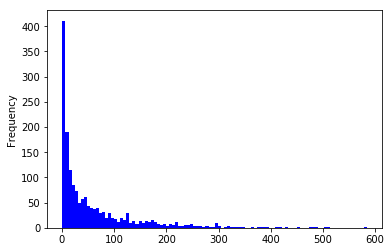

In [39]:
MeanCountRatings_df['count'].plot(bins = 100, kind = 'hist', color = 'b')

Looking at the count of these movies, majority of the reviews are below 100 counts.

### Checkout the Movies of 5 star ratings:

In [40]:
MeanCountRatings_df[MeanCountRatings_df['mean'] == 5]

,title,mean,count
30,Aiqing wansui (1994),5.0,1.0
462,Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
633,"Great Day in Harlem, A (1994)",5.0,1.0
944,Marlene Dietrich: Shadow and Light (1996),5.0,1.0
1172,Prefontaine (1997),5.0,3.0
1273,"Saint of Fort Washington, The (1993)",5.0,2.0
1277,Santa with Muscles (1996),5.0,2.0
1359,Someone Else's America (1995),5.0,1.0
1387,Star Kid (1997),5.0,3.0
1472,They Made Me a Criminal (1939),5.0,1.0


In [43]:
MeanCountRatings_df[MeanCountRatings_df['mean'] == 5].count()

title    10
mean     10
count    10
dtype: int64

It seems like there were only 10 counts of 5 star reviewed movie.

### Checkout the rest of the Movies that were rate the most:

In [44]:
MeanCountRatings_df.sort_values('count', ascending= False).head()

,title,mean,count
1398,Star Wars (1977),4.359589,584.0
333,Contact (1997),3.803536,509.0
498,Fargo (1996),4.155512,508.0
1234,Return of the Jedi (1983),4.007890,507.0
860,Liar Liar (1997),3.156701,485.0


# Stage 3 - 

# Stage 4 - 

# Stage 5 - 